In [20]:
import matplotlib.pyplot as plt
import pandas as pd

res = "./result/vicuna13_1.6_self-const/eval/xlsx/Vicuna13b_1.6_self-const_Pat.xlsx"

# Load the Excel file
xl = pd.ExcelFile(res)

# Load the specific sheet ('scoresheet' sheet)
df = xl.parse('scoresheet')

# Now you can work with the dataframe 'df'
df = df.loc[df.accuracy != -1]

In [1]:
df

NameError: name 'df' is not defined

In [22]:
# First, extract the first word of each question as the prefix
df['question_prefix'] = df['question'].str.split().str[0].str.lower()

# Define the columns to aggregate and their corresponding aggregation functions
aggregations = {
    'accuracy': 'mean',
    'logical': 'mean',
    'clarity': 'mean',
    'detail': 'mean',
    'irrelevancy': 'mean'
}

# Group by the question prefix and compute the average of each score
grouped_df = df.groupby('question_prefix').agg(aggregations)

# Reset the index to make 'question_prefix' a column again
grouped_df = grouped_df.reset_index()

grouped_df = grouped_df.loc[grouped_df.question_prefix != "?"]

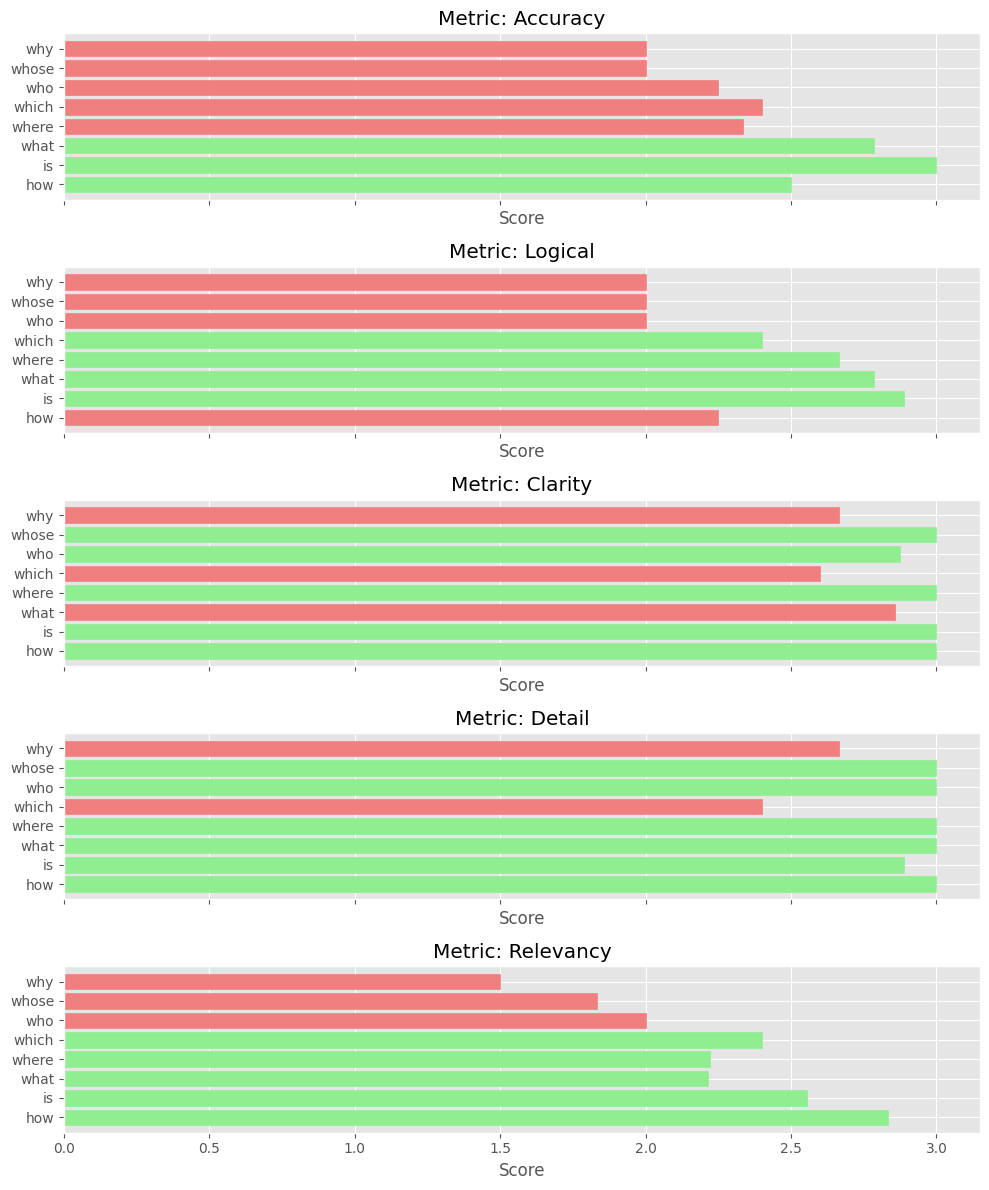

In [34]:
import matplotlib.pyplot as plt

# # Set the figure size
# plt.figure(figsize=(10, 8))

# # Extract the data for plotting
# question_prefix = grouped_df['question_prefix']
# scores = grouped_df[['accuracy', 'logical', 'clarity', 'detail', 'irrelevancy']]
# scores['relevancy'] = 4 - scores['irrelevancy']
# scores.drop(columns = ['irrelevancy'], inplace = True)

# # Set the positions for the bars
# positions = range(len(question_prefix))

# # Set the width for each bar
# bar_width = 0.15

# # Plot the bars for each score category
# for i, score in enumerate(scores.columns):
#     plt.barh([p + i * bar_width for p in positions], scores[score], height=bar_width, label=score)

# # Add labels, title, and legend
# plt.yticks([p + 2 * bar_width for p in positions], question_prefix)
# plt.xlabel('Score')
# plt.ylabel('Question Prefix')
# plt.title('Average Scores by Question Prefix')
# plt.legend()

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


# Sort the DataFrame by question prefix
grouped_df_sorted = grouped_df.sort_values(by='question_prefix')
grouped_df_sorted['relevancy'] = 4 - grouped_df_sorted["irrelevancy"]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12), sharex=True)

# Iterate over each metric and plot on separate axes
metrics = ['accuracy', 'logical', 'clarity', 'detail', 'relevancy']
for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.barh(grouped_df_sorted['question_prefix'], grouped_df_sorted[metric], color='skyblue')
    for bar, value in zip(bars, grouped_df_sorted[metric]):
        if value < grouped_df_sorted[metric].mean():
            bar.set_color('lightcoral')  # Set color light red for values below 2.0
        else:
            bar.set_color('lightgreen')  # Set color light green for values 2.0 or above
    ax.set_xlabel('Score')
    ax.set_title(f'Metric: {metric.capitalize()}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

